In [1]:
! pip install spacy # once for session

  Using cached https://files.pythonhosted.org/packages/24/de/ac14cd453c98656d6738a5669f96a4ac7f668493d5e6b78227ac933c5fd4/spacy-2.0.12.tar.gz
  Using cached https://files.pythonhosted.org/packages/5e/31/c8c1ecafa44db30579c8c457ac7a0f819e8b1dbc3e58308394fff5ff9ba7/murmurhash-0.28.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/be/fc/09684555ce0ee7086675e6be698e4efeb6d9b315fd5aa96bed347572282b/preshed-1.0.1.tar.gz
  Using cached https://files.pythonhosted.org/packages/94/b1/47a88072d0a38b3594c0a638a62f9ef7c742b8b8a87f7b105f7ed720b14b/thinc-6.10.3.tar.gz
  Using cached https://files.pythonhosted.org/packages/9e/9b/62c60d2f5bc135d2aa1d8c8a86aaf84edb719a59c7f11a4316259e61a298/plac-0.9.6-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/16/c4/79f3409bc710559015464e5f49b9879430d8f87498ecdc335899732e5377/ujson-1.35.tar.gz
  Using cached https://files.pythonhosted.org/packages/6f/78/8b96476f4ae426db71c6e86a8e6a81407f015b34547e442291cd397b18f3/dill-0.2.8

In [2]:
import numpy as np
import pandas as pd
import spacy
import nltk, re
from nltk.corpus import stopwords
nltk.download('stopwords')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /content/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
! git clone https://github.com/ideis/dl-recsys.git
# egagaments1 = pd.read_csv('/content/dl-recsys/data/theepochtimes_com/EET_20180628.zip', index_col=0)
# egagaments2 = pd.read_csv('/content/dl-recsys/data/theepochtimes_com/EET_20180627.zip', index_col=0)
# egagaments3 = pd.read_csv('/content/dl-recsys/data/theepochtimes_com/EET_20180626.zip', index_col=0)
# egagaments4 = pd.read_csv('/content/dl-recsys/data/theepochtimes_com/EET_20180625.zip', index_col=0)
egagaments5 = pd.read_csv('/content/dl-recsys/data/theepochtimes_com/EET_20180624.zip', index_col=0)
egagaments6 = pd.read_csv('/content/dl-recsys/data/theepochtimes_com/EET_20180623.zip', index_col=0)
egagaments7 = pd.read_csv('/content/dl-recsys/data/theepochtimes_com/EET_20180622.zip', index_col=0)


fatal: destination path 'dl-recsys' already exists and is not an empty directory.


In [0]:
text = pd.read_csv('/content/dl-recsys/data/theepochtimes_com/pages_EET_22-28.06.18.csv', index_col=0)



In [5]:
from urllib import parse
def return_right_from_slash(url):
    s = parse.urlsplit(url).path
    if s[-1] == '/':
        s1 = s[:-1]
    else:
        s1 = s
    pos = s1.rfind('/')
    if pos > 0:
        s2 = s1[pos:]
    else:
        s2 = s1
    # if s2 == '':
    #     s2 = '/'
    if len(s2)<5:
        s2 = '/'
    return s2
 
combined_csv = pd.concat( [egagaments5, egagaments6, egagaments7 ] )
combined_csv['pagePath'] = combined_csv['pagePath'].fillna(' ').apply(return_right_from_slash)
print(combined_csv.shape)
combined_csv.head()


(2015434, 4)


,fullVisitorId,visitStartTime,pagePath,country
0,88b526ee2d655644615e5c18fbeb7c5c,1529661427,/,United States
1,88b526ee2d655644615e5c18fbeb7c5c,1529661427,/,United States
2,88b526ee2d655644615e5c18fbeb7c5c,1529671360,/,United States
3,88b526ee2d655644615e5c18fbeb7c5c,1529671360,/,United States
4,bcc947913b50a12baa1d7395597658c8,1529660632,/,United States


In [6]:
combined_csv = combined_csv.drop_duplicates(subset=['fullVisitorId','pagePath'], keep='last')
print(combined_csv.shape)

(329430, 4)


In [7]:
df_result = pd.merge(combined_csv, text, on='pagePath', how='inner', validate = "many_to_one")
print(df_result.shape)
df_result.head()

(313094, 7)


,fullVisitorId,visitStartTime,pagePath,country,id,category,title
0,88da2bd559a0ea59749d6d51c389c248,1529856355,/,United States,294703,"[{""name"": ""/Arts & Entertainment"", ""confidence...","Breaking news, independent China news"
1,d28f2db038eb3363b97796e944a07784,1529860326,/,United States,294703,"[{""name"": ""/Arts & Entertainment"", ""confidence...","Breaking news, independent China news"
2,4e9d73c36475c3940bbf4a77a87f295e,1529816955,/,United States,294703,"[{""name"": ""/Arts & Entertainment"", ""confidence...","Breaking news, independent China news"
3,706fbce53ece3ce278b79e5928f08896,1529832354,/,United States,294703,"[{""name"": ""/Arts & Entertainment"", ""confidence...","Breaking news, independent China news"
4,59ae91025477dbce42914e663e6a1c20,1529899025,/,United States,294703,"[{""name"": ""/Arts & Entertainment"", ""confidence...","Breaking news, independent China news"


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [9]:
labels, levels = pd.factorize(df_result['fullVisitorId'])
print(labels)
data = pd.DataFrame()
#for i in labels: data[i] = labels[i]
data['user'] = labels
labels, levels = pd.factorize(df_result['id'])
data['ref'] = labels
data['push'] = np.ones(data['ref'].size, dtype = int)
data['time'] = df_result['visitStartTime']
print(data.shape)
data = data.sort_values(by = ['time'])
print(data)


[     0      1      2 ... 251807 251808 251809]
(313094, 4)
          user   ref  push        time
306792  247665  1844     1  1529640000
272259  223541   519     1  1529640001
184477  157780   179     1  1529640001
305743  223541  1787     1  1529640001
213234  179045   248     1  1529640002
312781  234811  3201     1  1529640003
308960  234811  2086     1  1529640003
295771  234811  1205     1  1529640003
308982  234811  2089     1  1529640003
312761  234811  3195     1  1529640003
287289  234811   853     1  1529640003
311762  234811  2784     1  1529640003
103296   98920    25     1  1529640004
103727   99343    25     1  1529640005
242138  201897   373     1  1529640006
300438  243593  1349     1  1529640008
94254    91897     9     1  1529640008
215266  181018   290     1  1529640008
41770    41770     0     1  1529640009
215156  180911   288     1  1529640009
169245  148871    86     1  1529640010
292829  238535  1064     1  1529640010
312181  148871  2912     1  1529640010
1051

In [10]:
from sklearn.model_selection import train_test_split
train = data[:-1000]
test = data[-1000:]
t = np.intersect1d(test['user'], train['user'])
test = test.set_index(['user'], drop = False).loc[t]
print(test)
print(test.shape)
train

          user   ref  push        time
user                                  
147        147     0     1  1529899080
483        483     0     1  1529898556
1445      1445    24     1  1529898662
2371      2371    56     1  1529898640
6045      6045   731     1  1529898578
6045      6045   191     1  1529898578
6272      6272    36     1  1529898734
6272      6272    21     1  1529898734
11253    11253     0     1  1529898921
14415    14415     0     1  1529898973
14598    14598     0     1  1529898892
16143    16143    52     1  1529898570
18129    18129   722     1  1529898667
18129    18129   684     1  1529898667
18129    18129     6     1  1529898667
18129    18129    54     1  1529898667
18132    18132    21     1  1529898687
18132    18132     0     1  1529898687
18754    18754    21     1  1529898527
20959    20959    29     1  1529899172
22093    22093    32     1  1529898650
27197    27197    36     1  1529898539
27665    27665    81     1  1529898533
38476    38476    21     

,user,ref,push,time
306792,247665,1844,1,1529640000
272259,223541,519,1,1529640001
184477,157780,179,1,1529640001
305743,223541,1787,1,1529640001
213234,179045,248,1,1529640002
312781,234811,3201,1,1529640003
308960,234811,2086,1,1529640003
295771,234811,1205,1,1529640003
308982,234811,2089,1,1529640003
312761,234811,3195,1,1529640003


In [95]:
#print(train.head())
#print(train.groupby('ref').count()['user'].sort_values())
data_f = train.groupby('ref').count()['user'].sort_values()[-11:-1]
# data_f.set_index()
data_f = data_f.reset_index()
print(data_f)

   ref   user
0   33   4538
1  203   5882
2  205   5912
3  128   6703
4  470   6957
5  371   6975
6   61   8834
7  363   9579
8   38  10513
9   36  11308


0.7599999999999991 0.04903225806451616


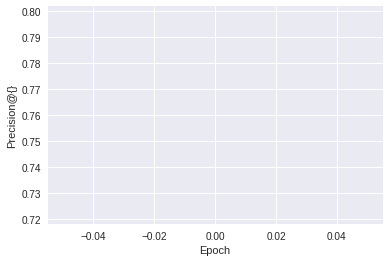

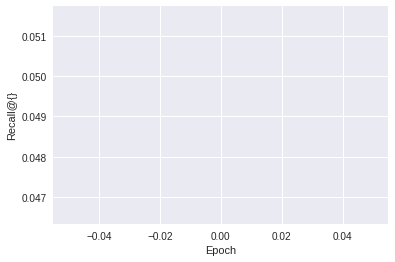

In [99]:
def answer(user):
    fdv = test.set_index(['user']).loc[[user]]
    chisl1 = set(fdv['ref']).intersection(set(data_f['ref'])) #количество угаданных элементов
    chisl = len(chisl1)
    prec =  chisl/10
    rec = chisl/len(test.user)
    return prec, rec;

def calculate_average_recall_and_precision(source):
    prec, rec = 0, 0
    for i in test.user:
      prec_i, rec_i = answer(i)
      prec += prec_i
      rec += rec_i
    prec = prec/source.user.shape[0]
    rec = rec/source.user.shape[0]
    return prec, rec;
precision, recall = calculate_average_recall_and_precision(data_f)
print(precision, recall)

pd.Series(precision).plot()
plt.xlabel('Epoch')
plt.ylabel('Precision@{}')
plt.show()

pd.Series(recall).plot()
plt.xlabel('Epoch')
plt.ylabel('Recall@{}')
plt.show()